In [1]:
from skimage.io import imsave, imread, imshow
from numpy import roll, dstack
%matplotlib inline
from skimage import img_as_float, img_as_ubyte

In [2]:
def getbestcor(firstimage, secondimage):
    from numpy import roll
    maxcory = 0
    maxcorx = 0
    pretendy = 0
    pretendx = 0
    secondimagey = roll(secondimage, -15, axis=0)
    secondimagex = roll(secondimage, -15, axis=1)
    for i in range(32):
        curcory = (firstimage * secondimagey).sum()
        curcorx = (firstimage * secondimagex).sum()
        if curcory > maxcory:
            maxcory = curcory
            pretendy = i - 15
        if curcorx > maxcorx:
            maxcorx = curcorx
            pretendx = i - 15
        secondimagey = roll(secondimagey, 1, axis=0)
        secondimagex = roll(secondimagex, 1, axis=1)
    return pretendy, pretendx

In [3]:
def cutter(img):
    hshape = img.shape[0]
    thirdpart = int(hshape / 3)
    deadsome = img.shape[0] % 3
    r = img[2 * thirdpart: img.shape[0] - deadsome, :]
    g = img[thirdpart: 2 * thirdpart, :]
    b = img[0: thirdpart, :]
    return r, g, b , thirdpart

In [4]:
def align(img):
    img = img_as_float(img)
    r, g, b, thirdpart = cutter(img)
    rounder = 0.34
    vkill = int(r.shape[0] * rounder)
    hkill = int(r.shape[1] * rounder)  # мозг уже умер, но тело работало дальше
    rshort = r[vkill: -vkill, hkill: - hkill]
    gshort = g[vkill: -vkill, hkill: - hkill]
    bshort = b[vkill: -vkill, hkill: - hkill]
    g2ry, g2rx = getbestcor(gshort, rshort)
    g2by, g2bx = getbestcor(gshort, bshort)
    r = roll(r, g2ry, axis=0)
    r = roll(r, g2rx, axis=1)
    b = roll(b, g2by, axis=0)
    b = roll(b, g2bx, axis=1)
    res = dstack((r, g, b))
    return res

In [5]:
ims = []
ims.append(imread('0.jpg'))
ims.append(imread('1.jpg'))
ims.append(imread('2.jpg'))

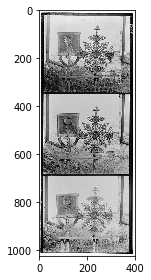

In [6]:
imshow(ims[0])

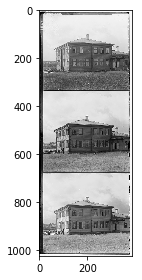

In [7]:
imshow(ims[1])

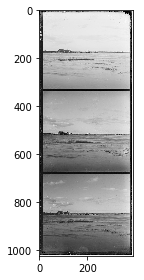

In [8]:
imshow(ims[2])

In [9]:
imo = []
for im in ims:
    imo.append(img_as_ubyte(align(im)))

D:\Program\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [10]:
i = 0
for im in imo:
    imsave(str(i) + '_out.png', im)
    i -=- 1

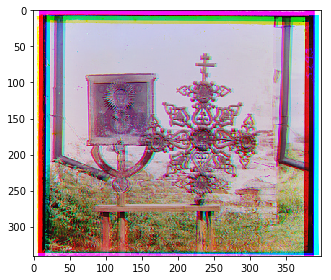

In [11]:
imshow(imo[0])

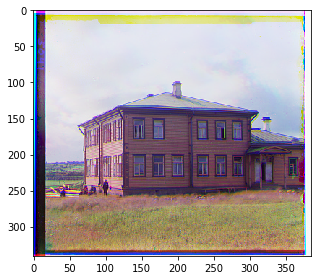

In [12]:
imshow(imo[1])

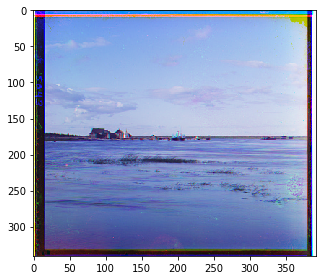

In [13]:
imshow(imo[2])